In [1]:
%matplotlib inline
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
def cpm_periodogram(fits_file, t_row=32, t_col=32):
    cpm = tess_cpm.CPM(fits_file, remove_bad=True)
    cpm.set_target(t_row, t_col)
    cpm.set_exclusion(10)
    cpm.set_predictor_pixels(256, method='cosine_similarity')
    cpm.lsq(0.1, rescale=True, polynomials=False)
    tess_cpm.summary_plot(cpm, 10)
    aperture_lc, lc_matrix = cpm.get_aperture_lc(box=1, show_pixel_lc=True, show_aperture_lc=True)
    lc = lk.LightCurve(time=cpm.time, flux=aperture_lc)
    pg = lc.to_periodogram(oversample_factor=10)
    fig, axs = plt.subplots(2, 1, figsize=(15, 8))
    pg.plot(ax=axs[0], c='k')
    pg.plot(ax=axs[1], c='k', view='period')
    fig.suptitle("Periodogram", fontsize=20, y=0.95)
    period = pg.period_at_max_power
    print(f"Max Power Period: {period}")
    lc.fold(period.value*4).scatter()
    plt.title(f"Folded Lightcurve with Period: {period:.4f}", fontsize=20)
    return cpm

In [3]:
# fits_file = "provided_sources/tess-s0005-1-3_70.445653_7.275704_64x64_astrocut.fits"
# fits_file = "provided_sources/tess-s0005-1-3_72.267451_8.981257_64x64_astrocut.fits"
# fits_file = "provided_sources/tess-s0005-1-3_71.975577_7.370718_64x64_astrocut.fits"
# fits_file = "provided_sources/tess-s0006-1-1_84.180039_3.774854_64x64_astrocut.fits"
# fits_file = "provided_sources/tess-s0002-1-3_357.154800_-15.211056_64x64_astrocut.fits"

Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Max Power Period: 18.541826520647323 d


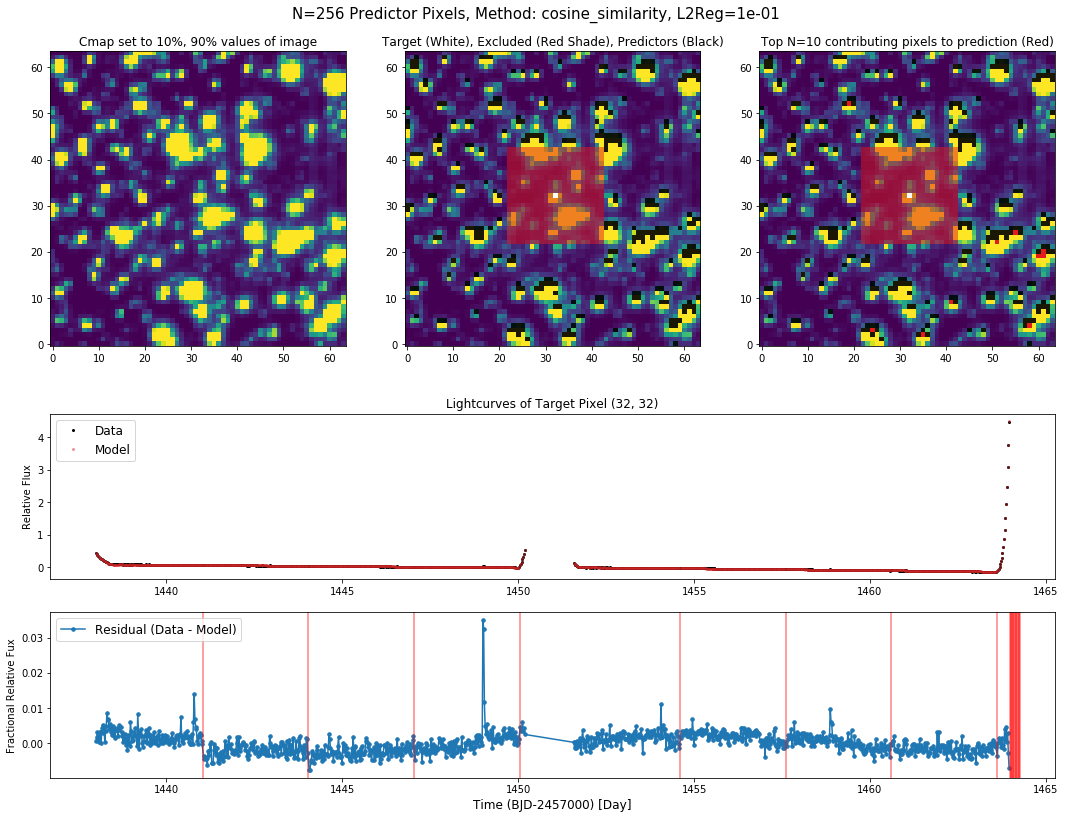

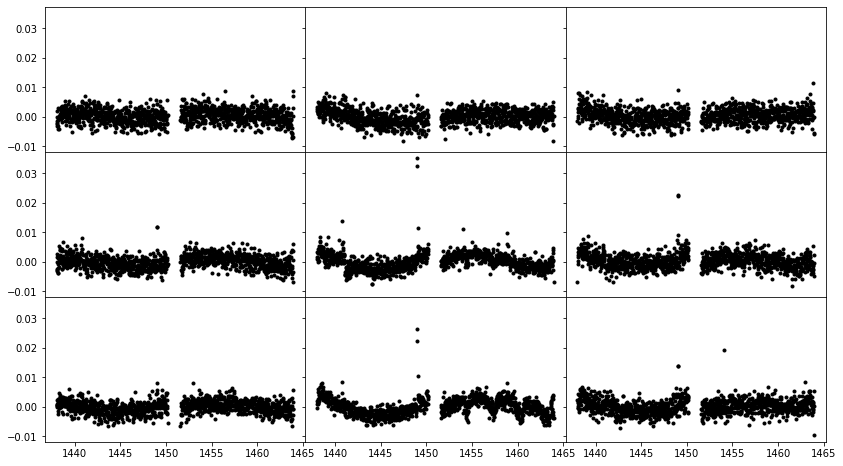

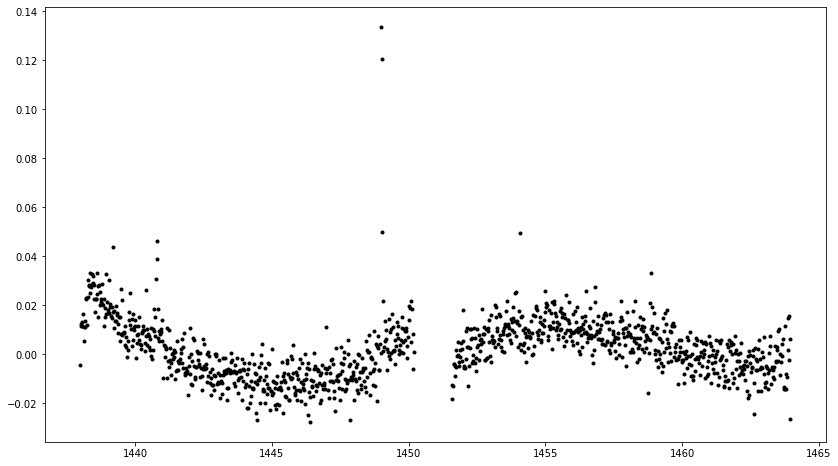

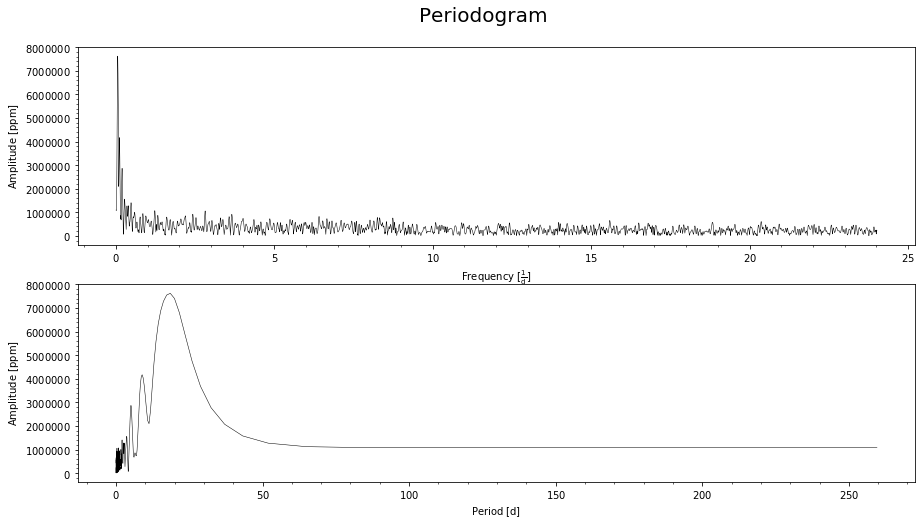

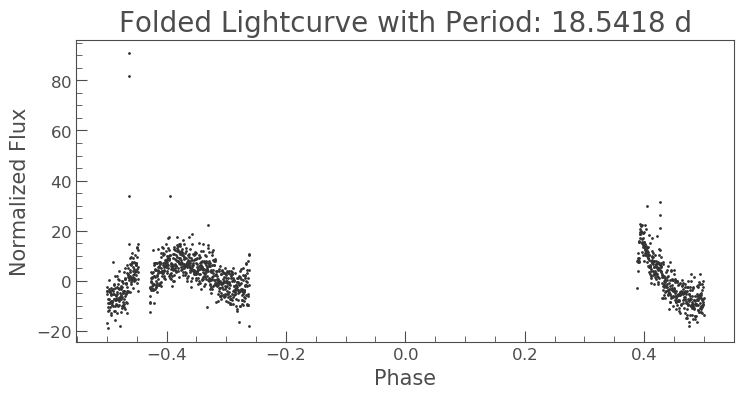

In [4]:
cpm_periodogram("provided_sources/tess-s0005-1-3_70.445653_7.275704_64x64_astrocut.fits")

Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Max Power Period: 0.4538209288270324 d


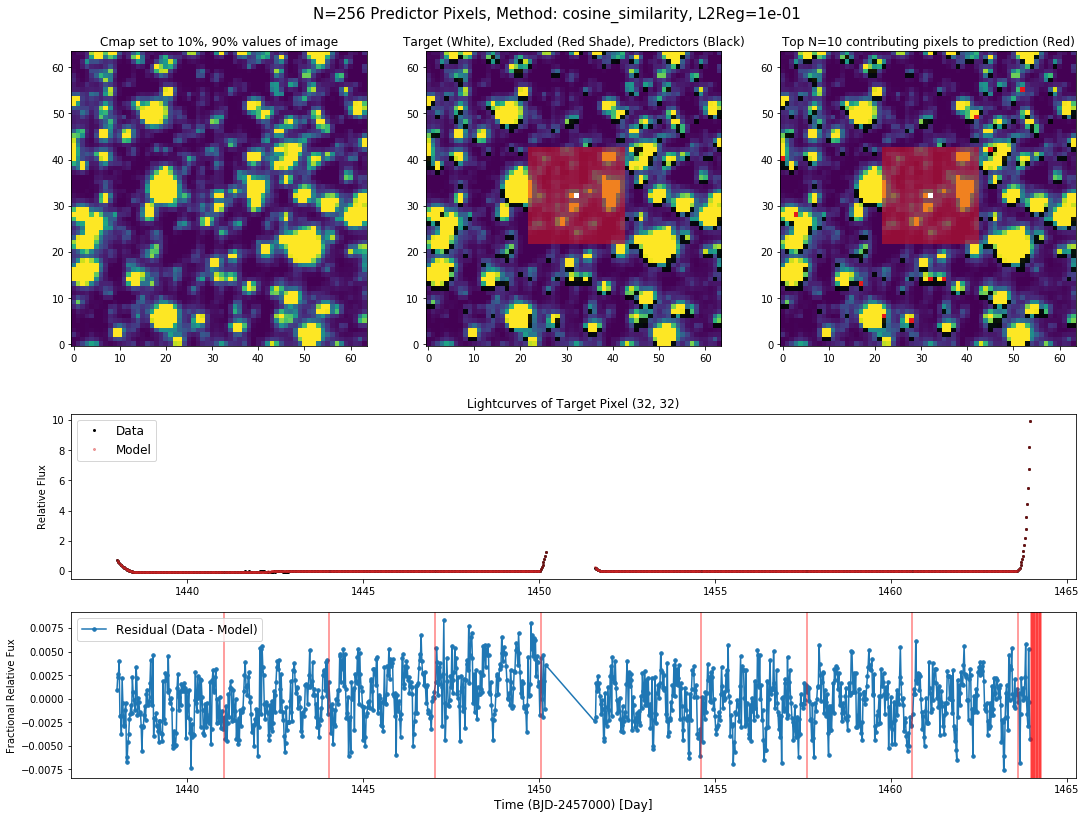

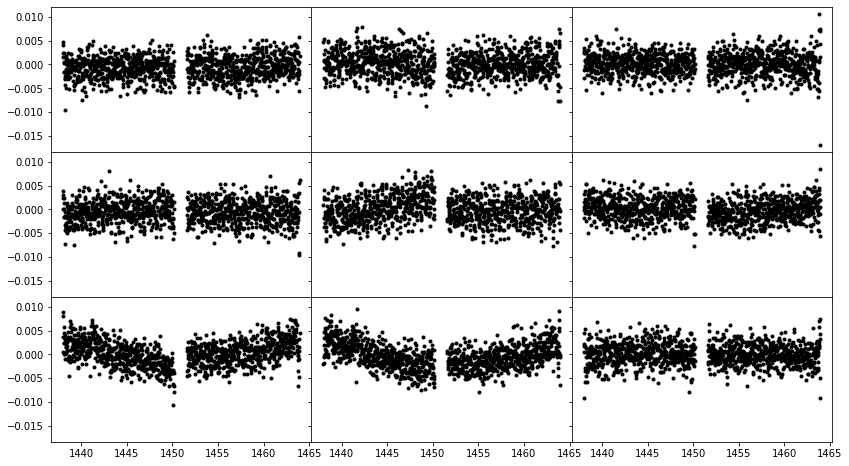

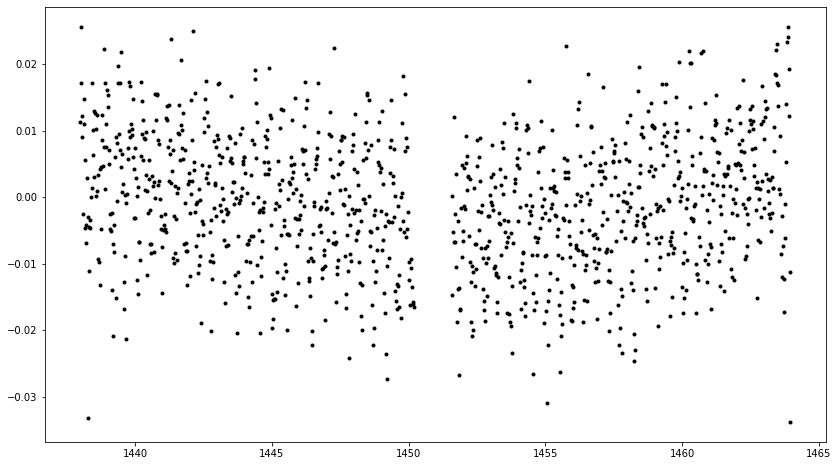

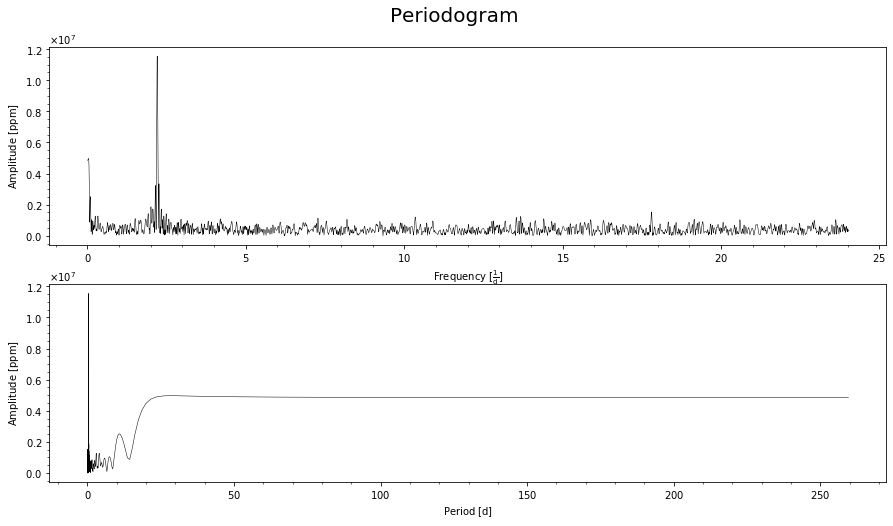

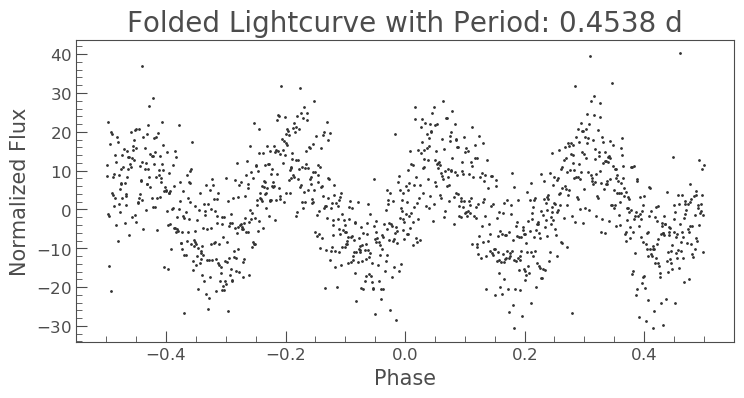

In [5]:
cpm_periodogram("provided_sources/tess-s0005-1-3_72.267451_8.981257_64x64_astrocut.fits")

Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Removing 23 bad data points (out of 1196) using the TESS provided "QUALITY" array
Max Power Period: 1.35908676067572 d


/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


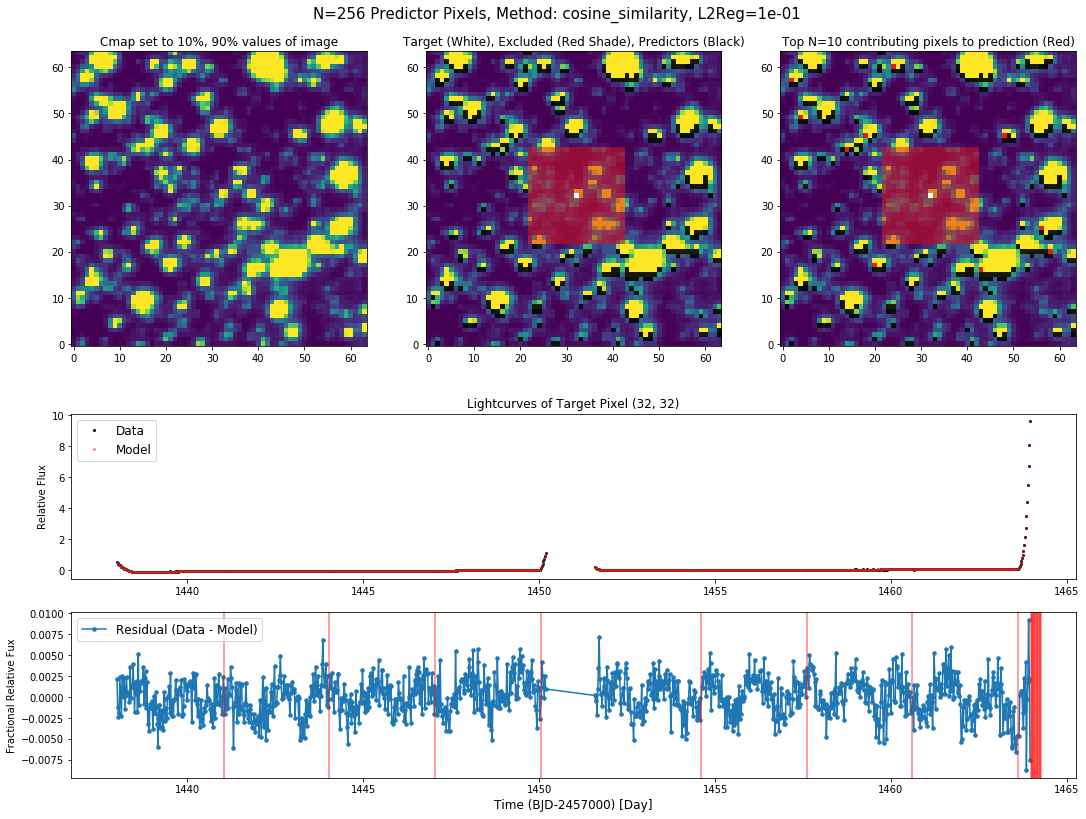

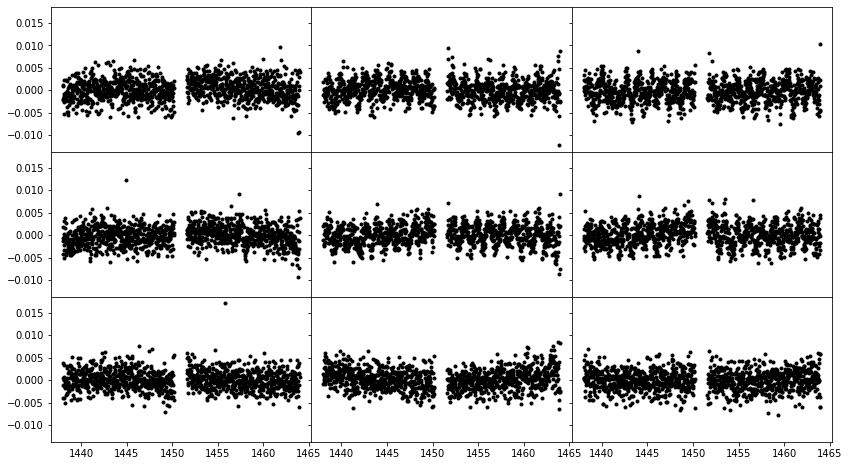

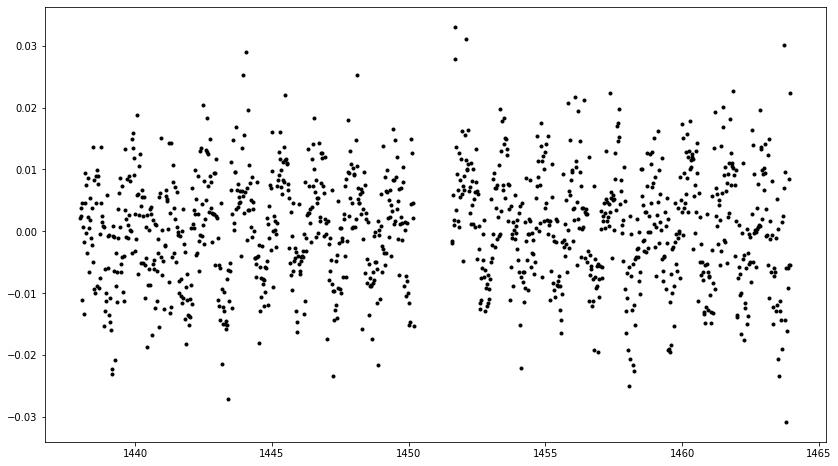

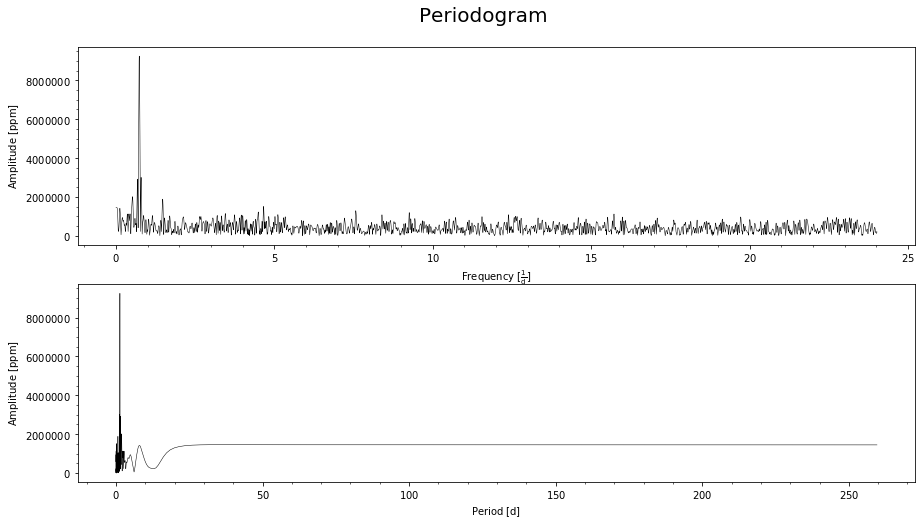

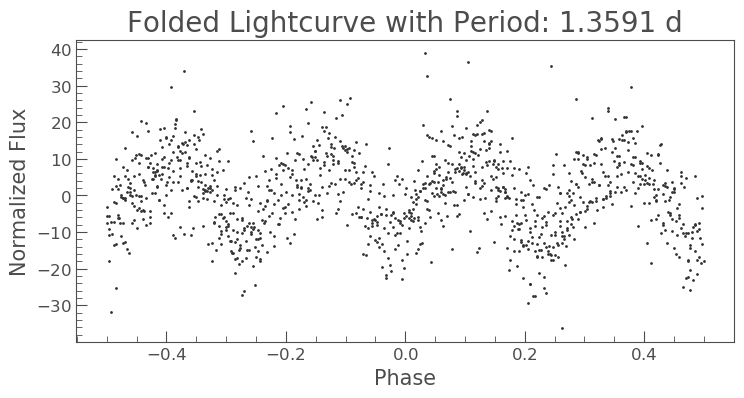

In [6]:
cpm_periodogram("provided_sources/tess-s0005-1-3_71.975577_7.370718_64x64_astrocut.fits")

Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Removing 6 bad data points (out of 993) using the TESS provided "QUALITY" array
Max Power Period: 8.055442527488426 d


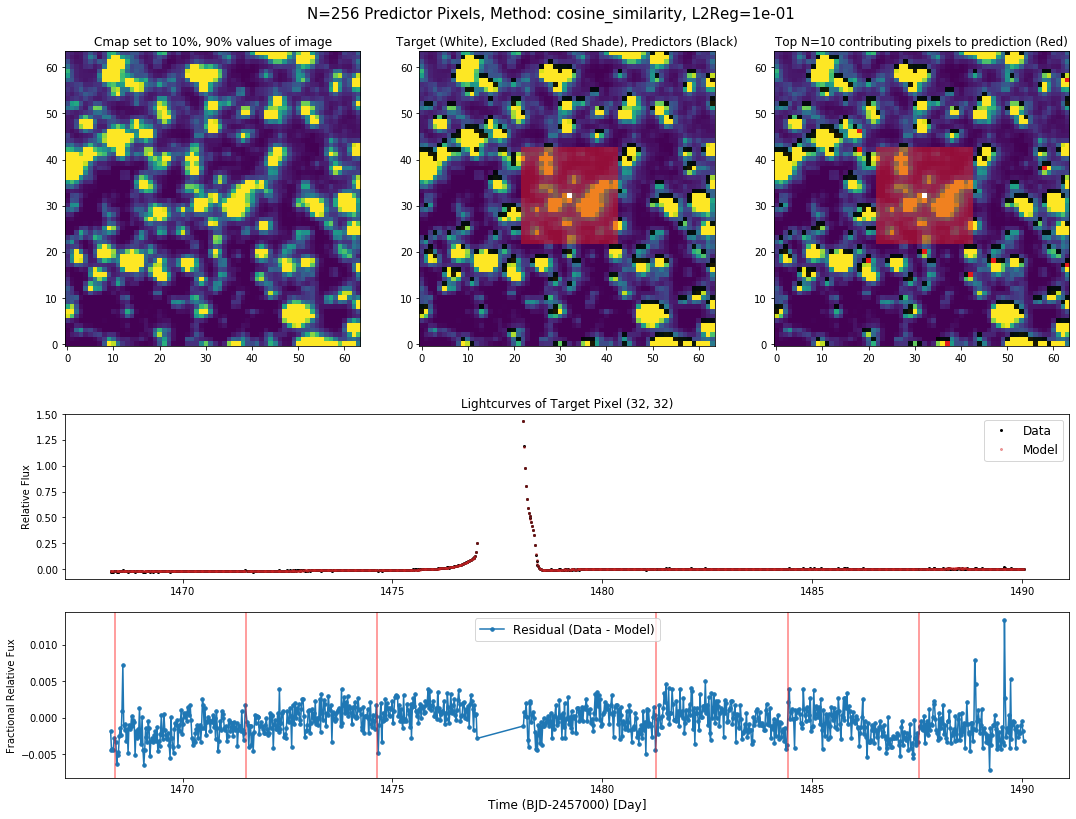

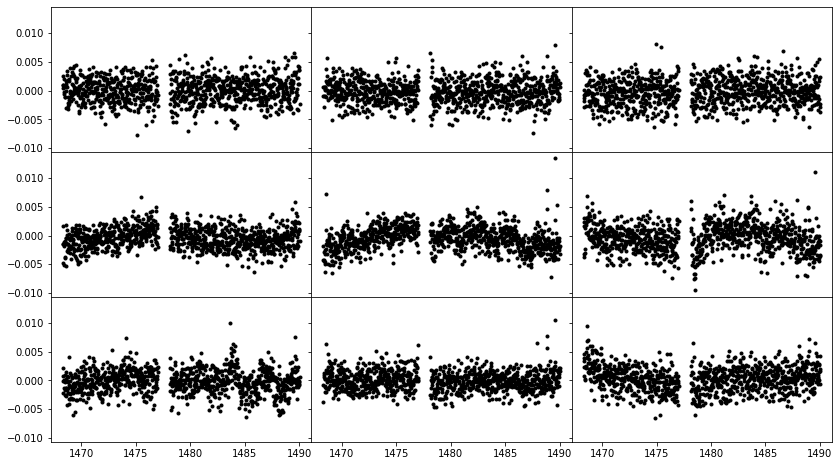

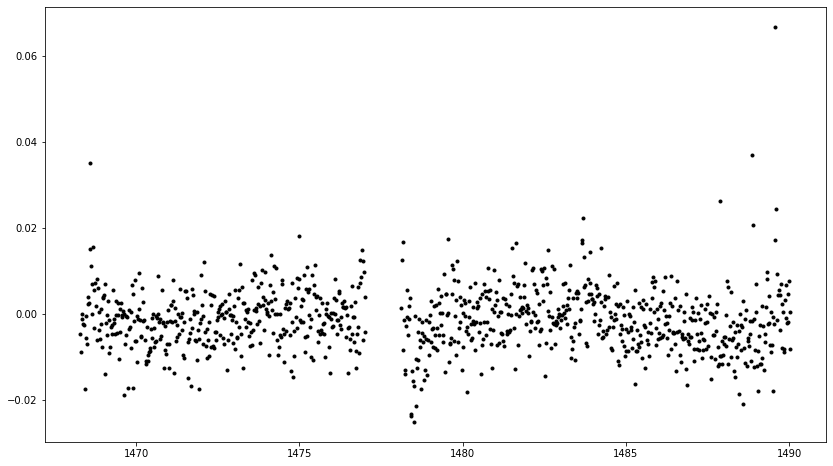

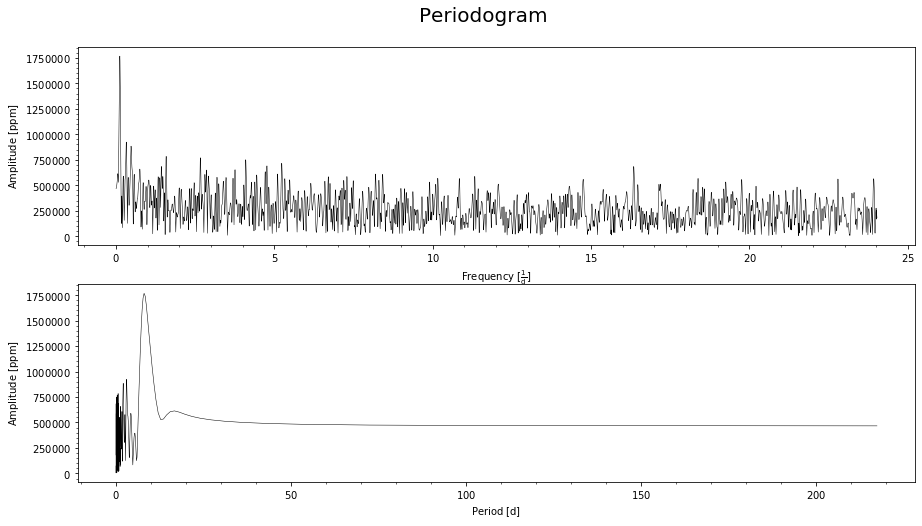

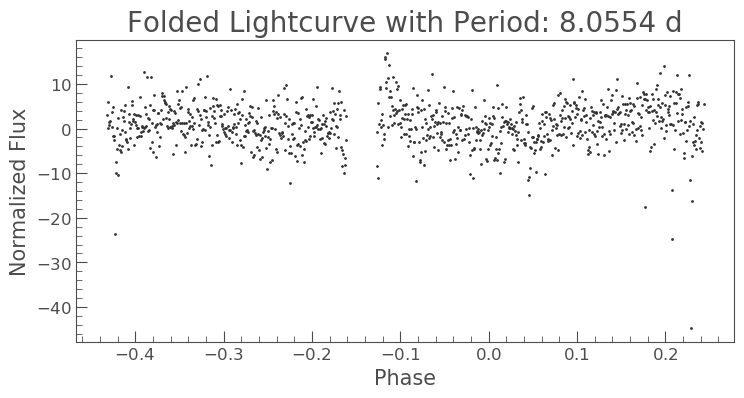

In [7]:
cpm_periodogram("provided_sources/tess-s0006-1-1_84.180039_3.774854_64x64_astrocut.fits")

Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Removing 17 bad data points (out of 1245) using the TESS provided "QUALITY" array
Max Power Period: 91.18123372395831 d


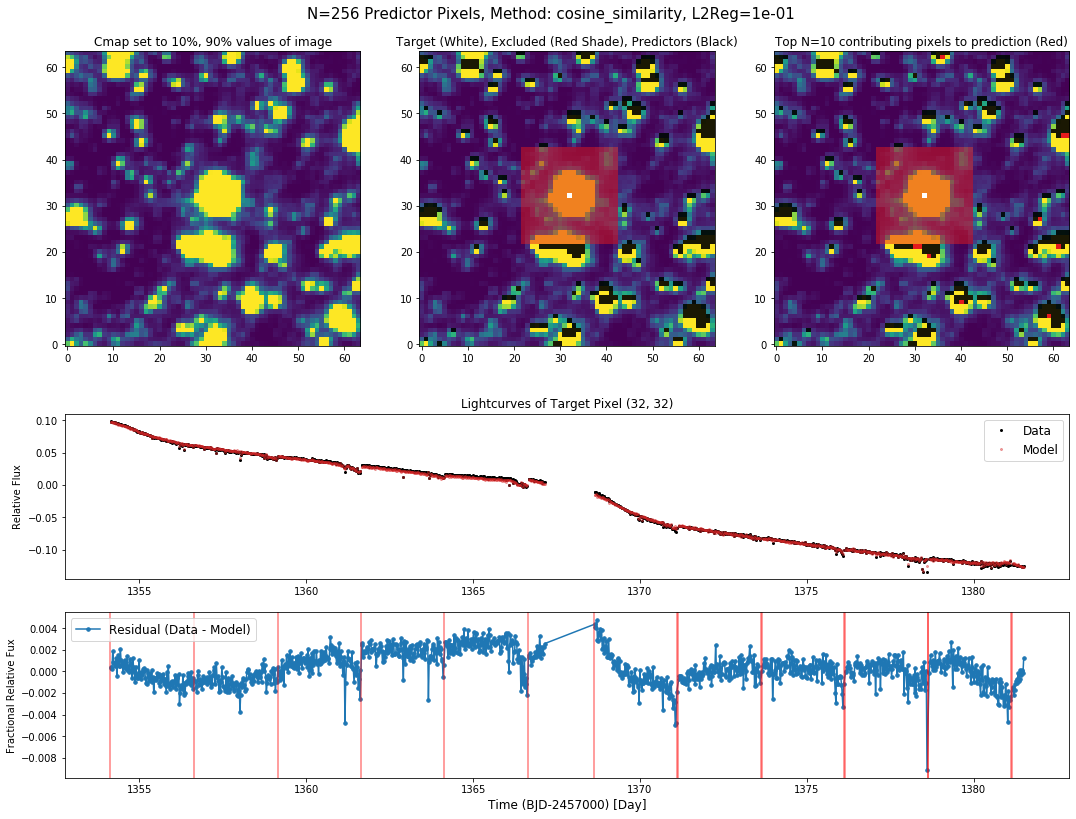

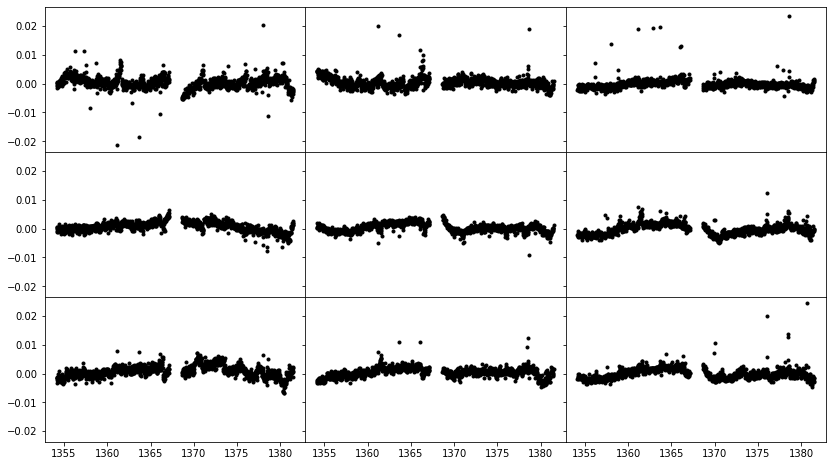

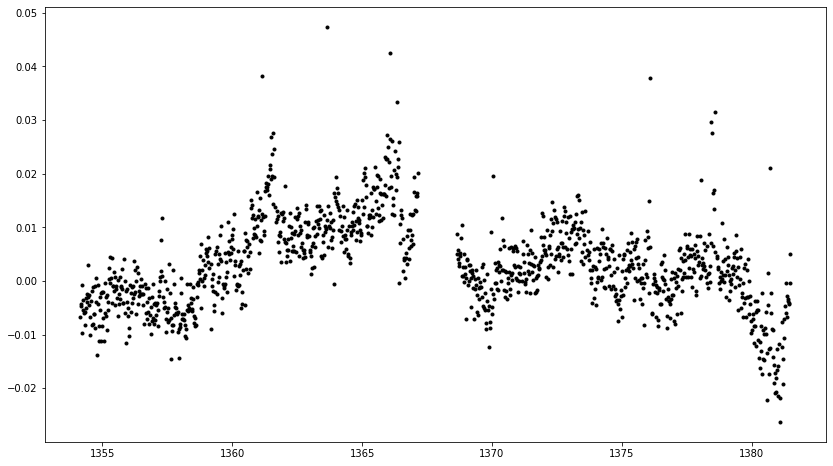

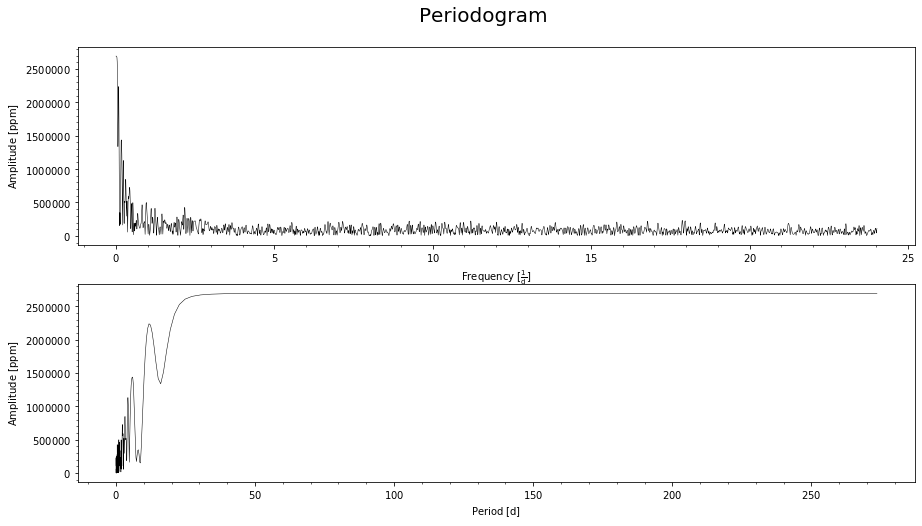

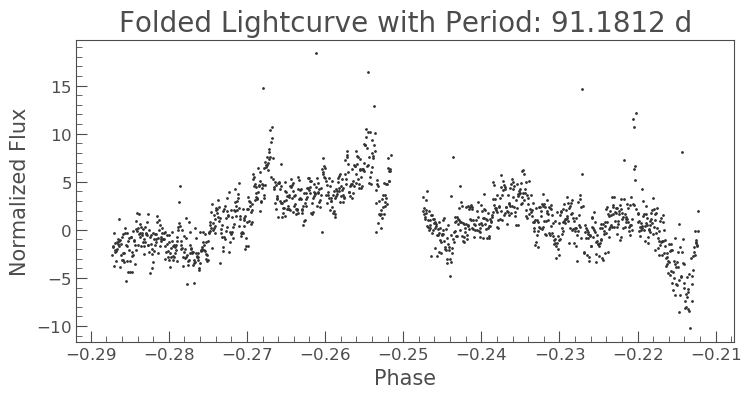

In [8]:
cpm_periodogram("provided_sources/tess-s0002-1-3_357.154800_-15.211056_64x64_astrocut.fits")

Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Max Power Period: 6.50006103515625 d


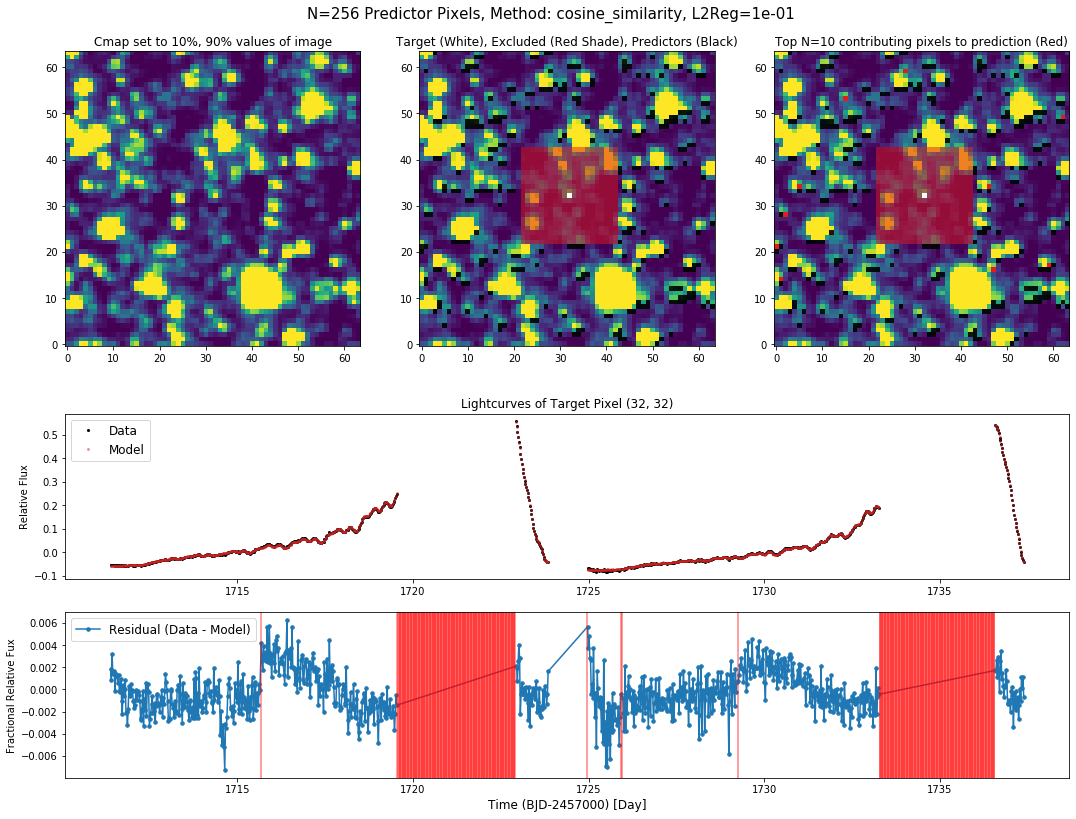

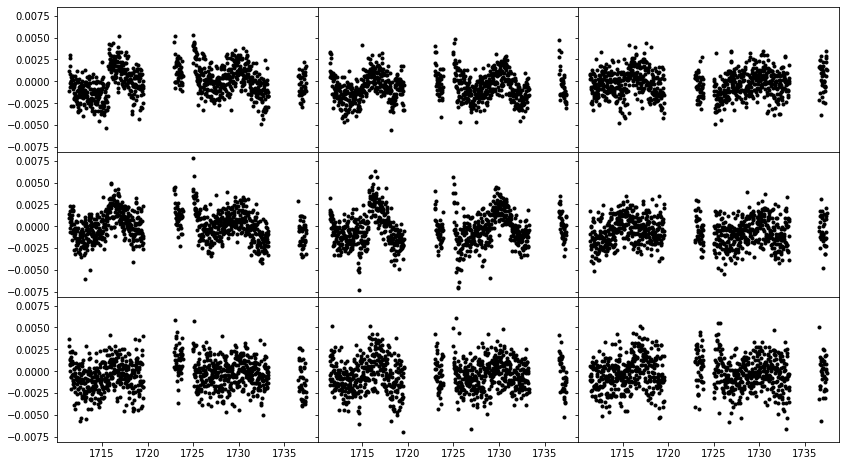

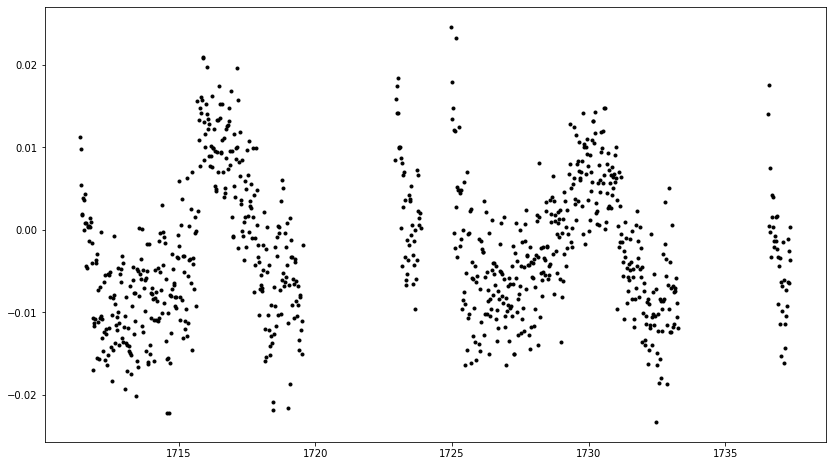

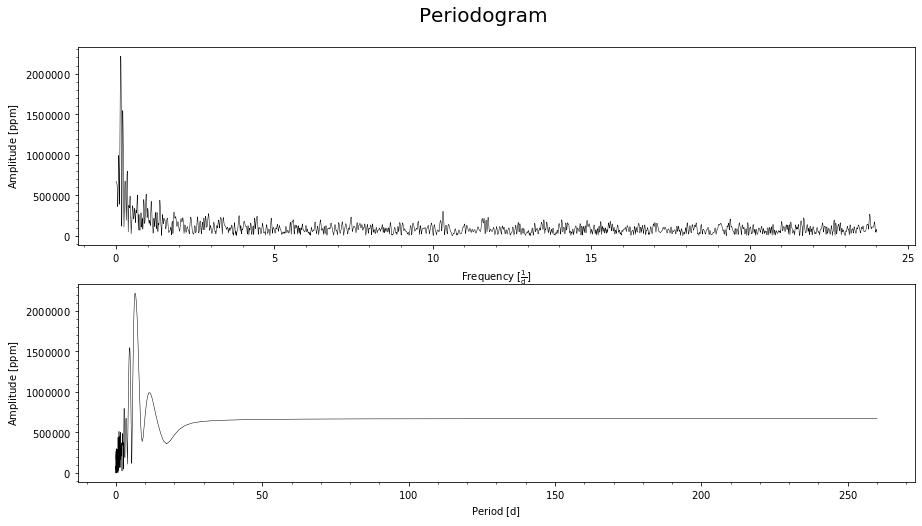

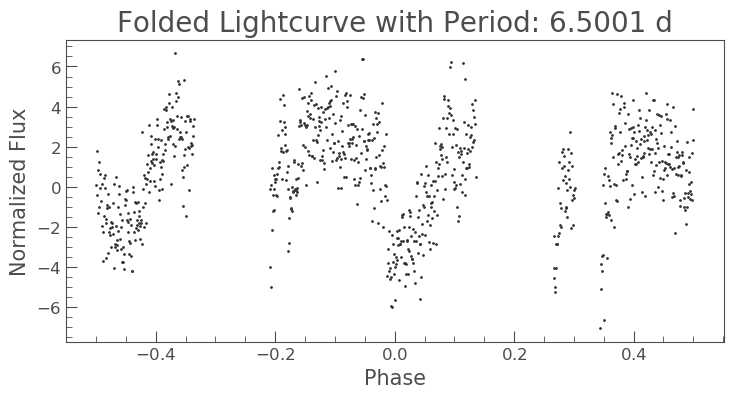

In [9]:
cpm_periodogram("provided_sources/tess-s0015-1-1_321.475220_46.623558_64x64_astrocut.fits")

Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array


Max Power Period: 0.15643949543095664 d


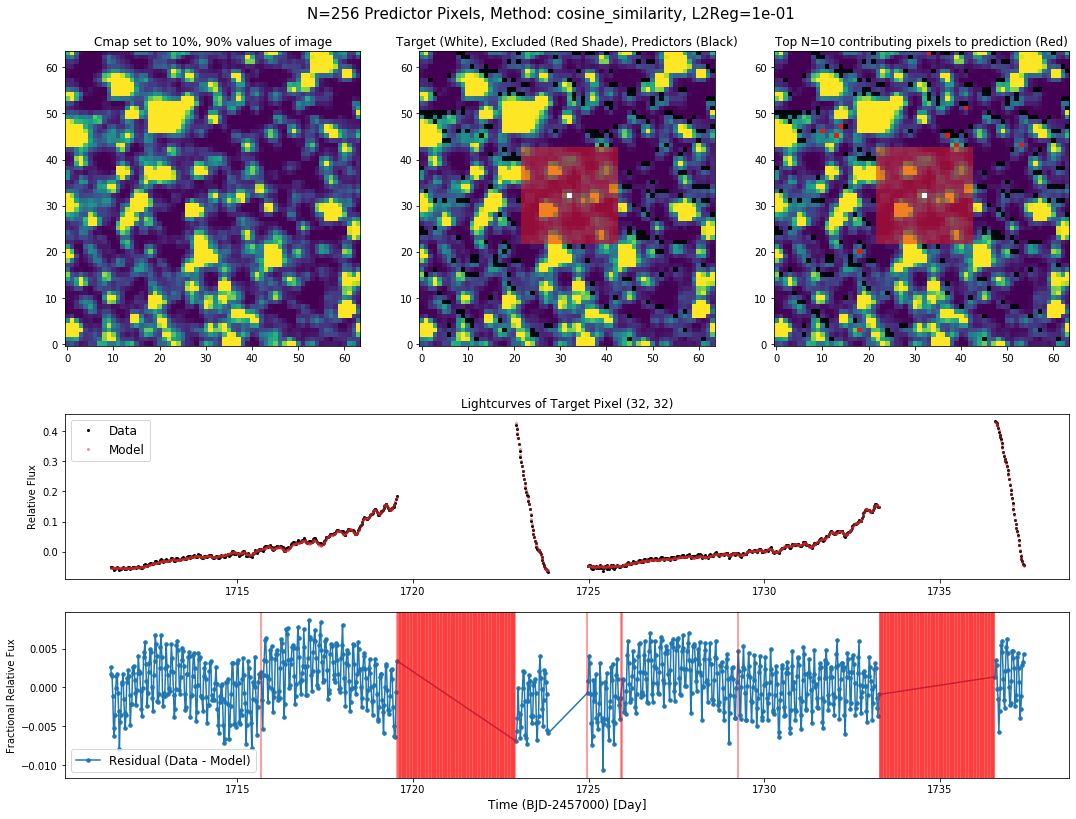

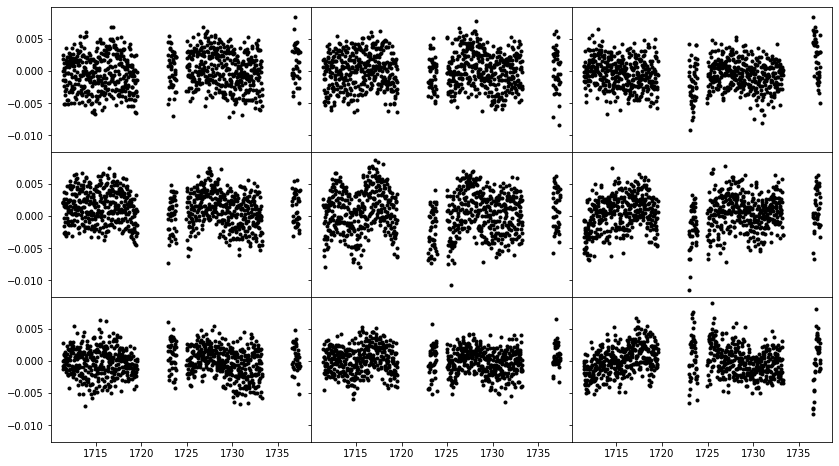

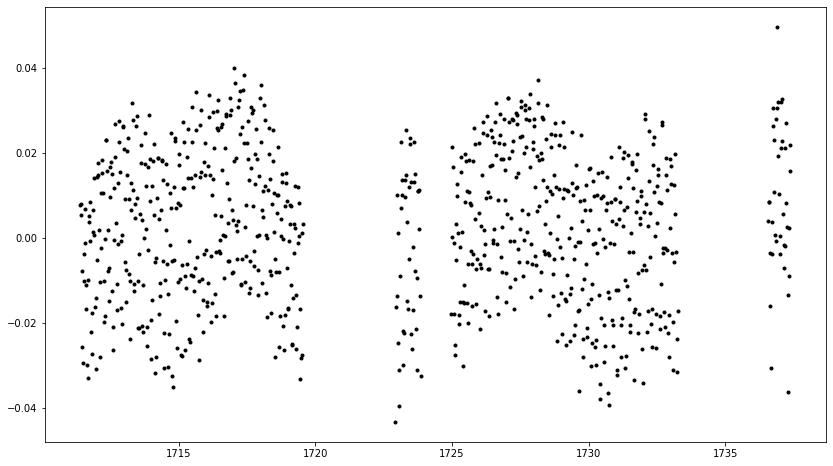

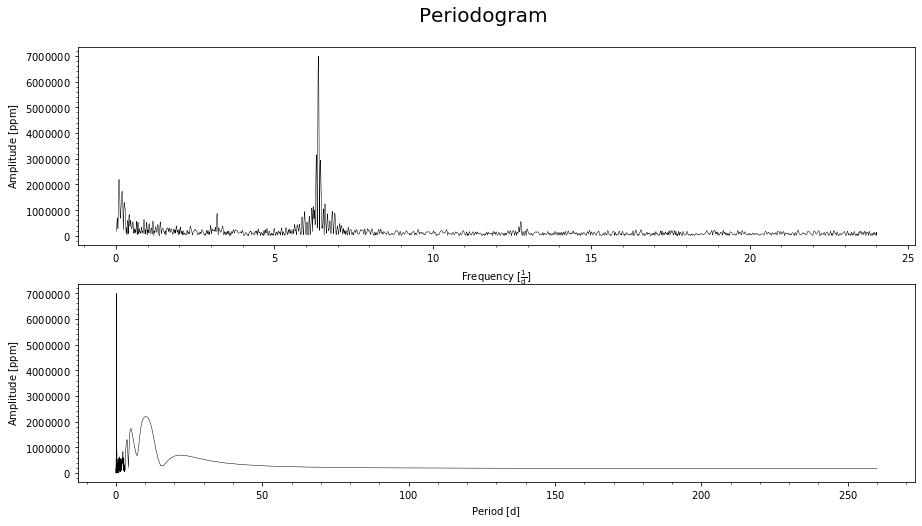

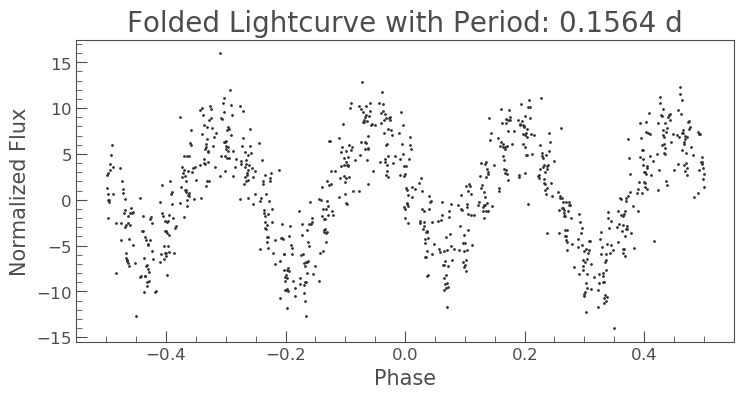

In [10]:
cpm = cpm_periodogram("provided_sources/tess-s0015-1-1_322.782190_48.644292_64x64_astrocut.fits")
# aperture_lc, lc_matrix = cpm.get_aperture_lc(show_pixel_lc=True, show_aperture_lc=True)

In [11]:
# lc = lk.LightCurve(time=cpm.time, flux=aperture_lc)
# pg = lc.to_periodogram(oversample_factor=10)
# fig, axs = plt.subplots(2, 1, figsize=(15, 8))
# pg.plot(ax=axs[0], c='k')
# pg.plot(ax=axs[1], c='k', view='period')
# fig.suptitle("Periodogram", fontsize=20, y=0.95)
# period = pg.period_at_max_power
# print(f"Max Power Period: {period}")
# lc.fold(period.value*4).scatter()
# plt.title(f"Folded Lightcurve with Period: {period:.4f}", fontsize=20)

Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array


/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Max Power Period: 7.027093010979729 d


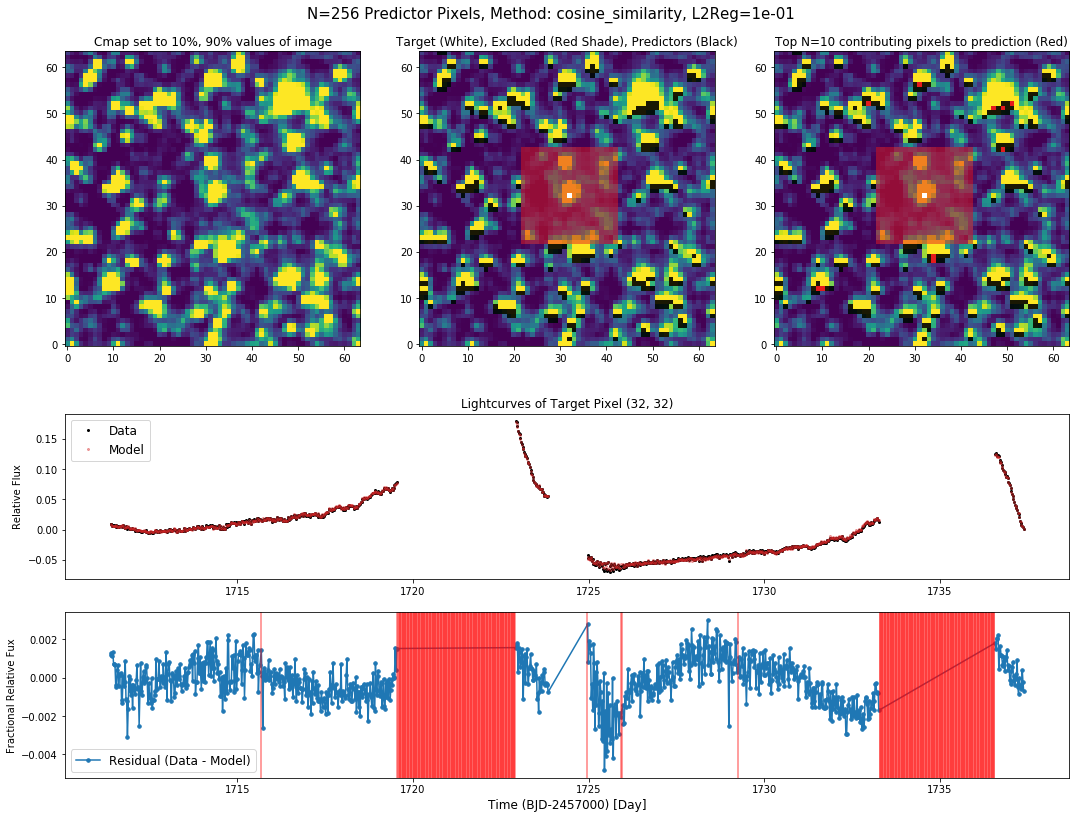

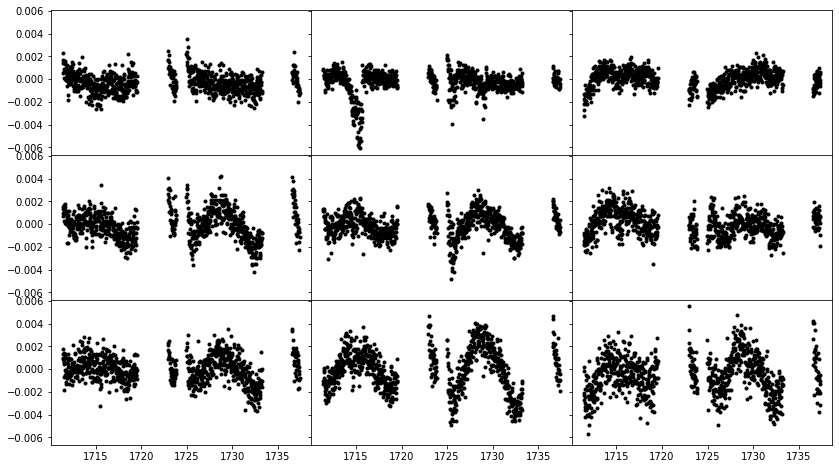

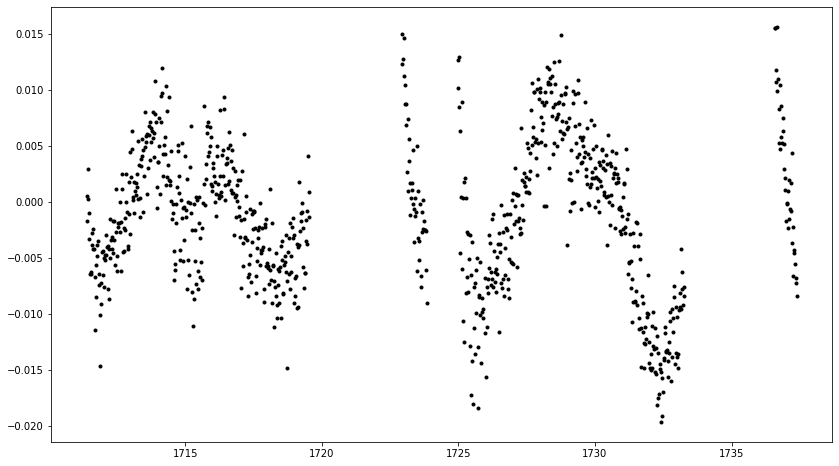

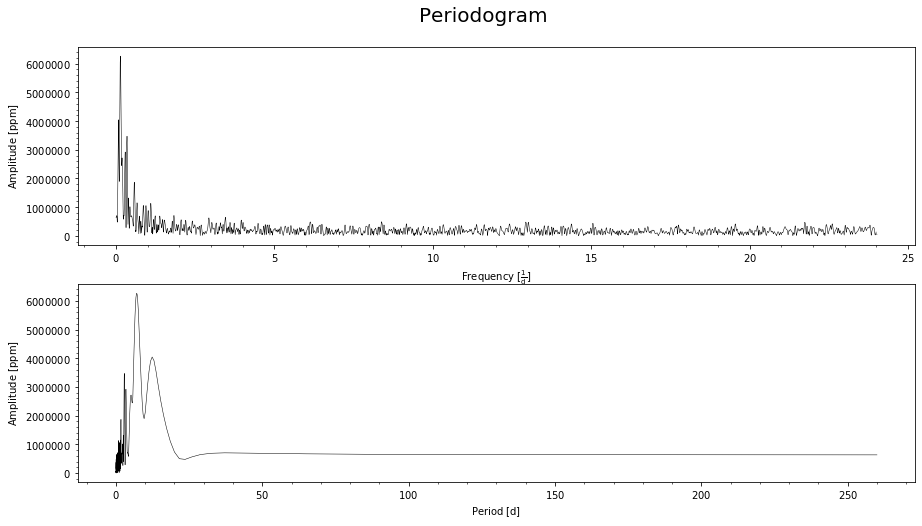

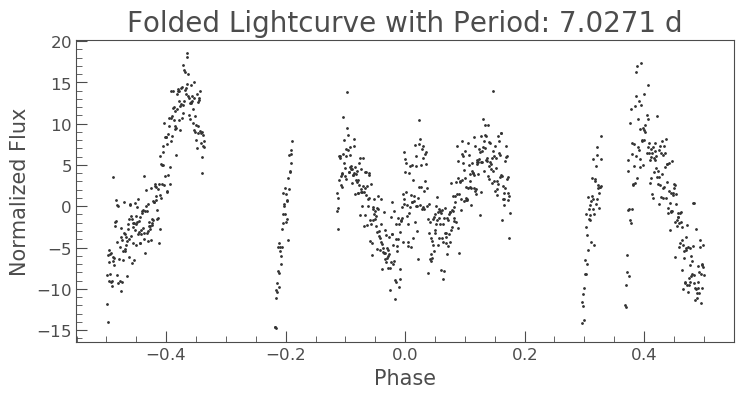

In [12]:
cpm = cpm_periodogram("provided_sources/tess-s0015-1-1_322.748930_47.808133_64x64_astrocut.fits")
# aperture_lc, lc_matrix = cpm.get_aperture_lc(show_pixel_lc=True, show_aperture_lc=True)

In [ ]:
# lc = lk.LightCurve(time=cpm.time, flux=aperture_lc)
# pg = lc.to_periodogram(oversample_factor=10)
# fig, axs = plt.subplots(2, 1, figsize=(15, 8))
# pg.plot(ax=axs[0], c='k')
# pg.plot(ax=axs[1], c='k', view='period')
# fig.suptitle("Periodogram", fontsize=20, y=0.95)
# period = pg.period_at_max_power
# print(f"Max Power Period: {period}")
# lc.fold(period.value*4).scatter()
# plt.title(f"Folded Lightcurve with Period: {period:.4f}", fontsize=20)

Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array


Max Power Period: 0.8873803460964164 d


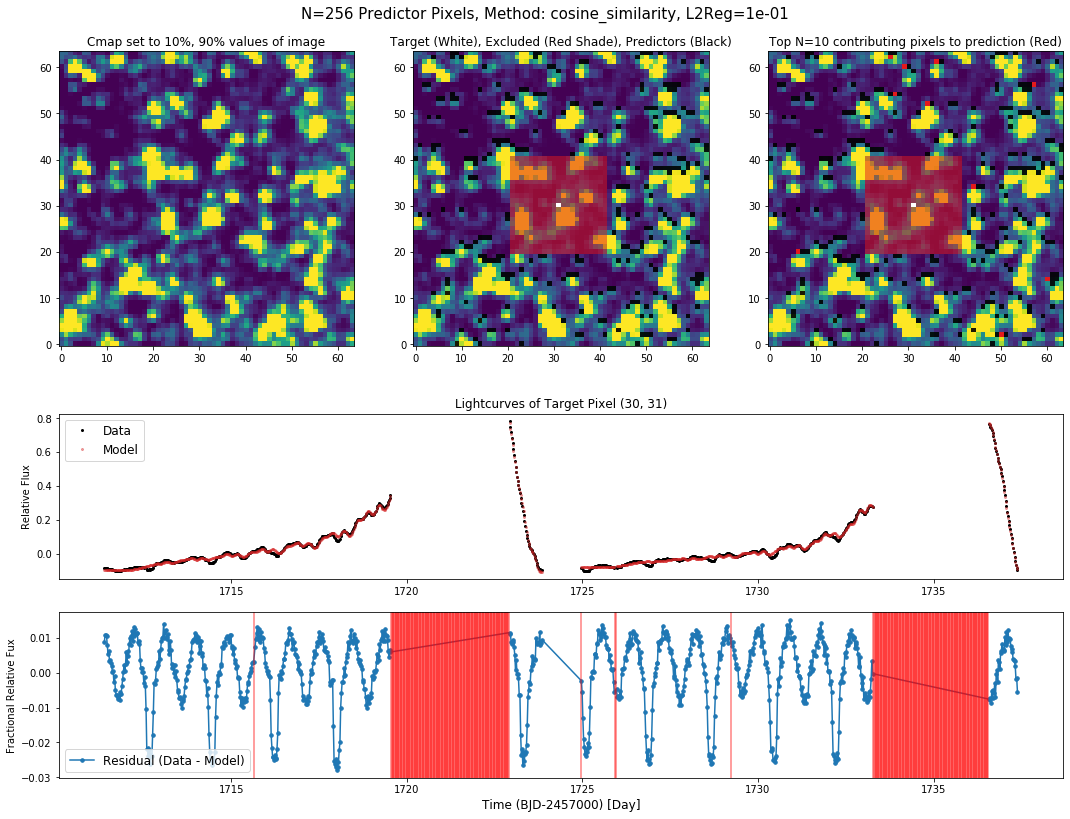

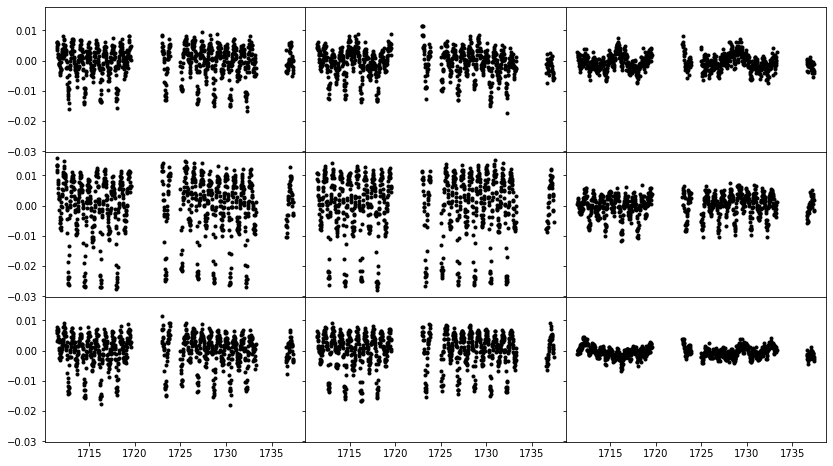

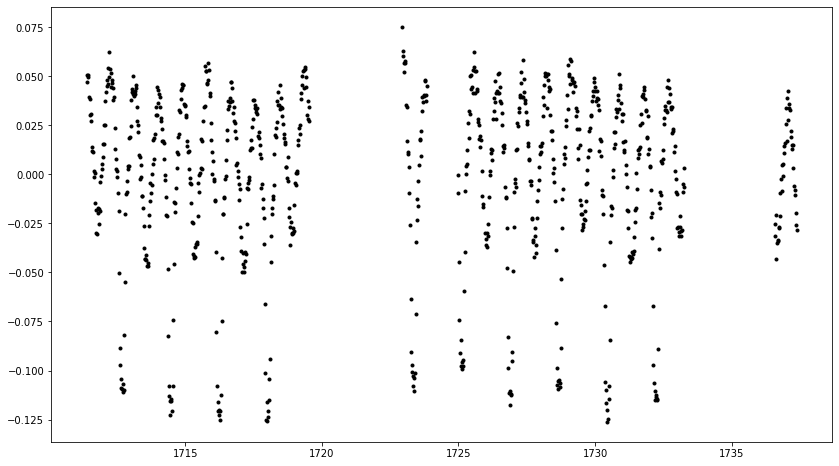

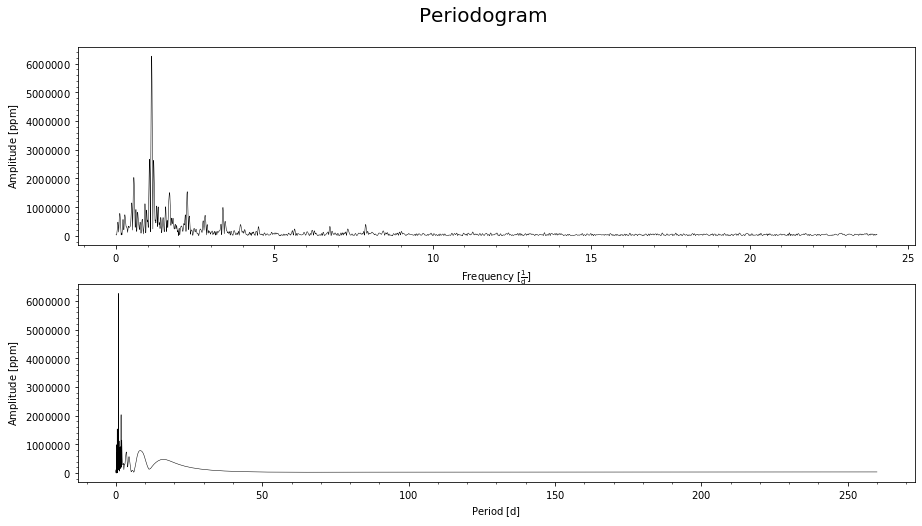

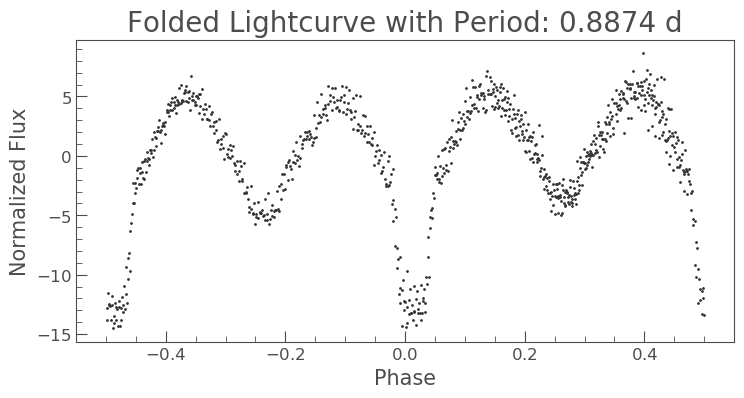

In [16]:
# cpm = cpm_periodogram("provided_sources/tess-s0015-1-1_322.878520_47.920650_64x64_astrocut.fits")  # Center

cpm = cpm_periodogram("provided_sources/tess-s0015-1-1_322.878520_47.920650_64x64_astrocut.fits", t_row=30, t_col=31)

In [14]:
# lc = lk.LightCurve(time=cpm.time, flux=aperture_lc)
# pg = lc.to_periodogram(oversample_factor=10)
# fig, axs = plt.subplots(2, 1, figsize=(15, 8))
# pg.plot(ax=axs[0], c='k')
# pg.plot(ax=axs[1], c='k', view='period')
# fig.suptitle("Periodogram", fontsize=20, y=0.95)
# period = pg.period_at_max_power
# print(f"Max Power Period: {period}")
# lc.fold(period.value*4).scatter()
# plt.title(f"Folded Lightcurve with Period: {period:.4f}", fontsize=20)

Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Removing 325 bad data points (out of 1197) using the TESS provided "QUALITY" array
Max Power Period: 3.13255953501506 d


/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


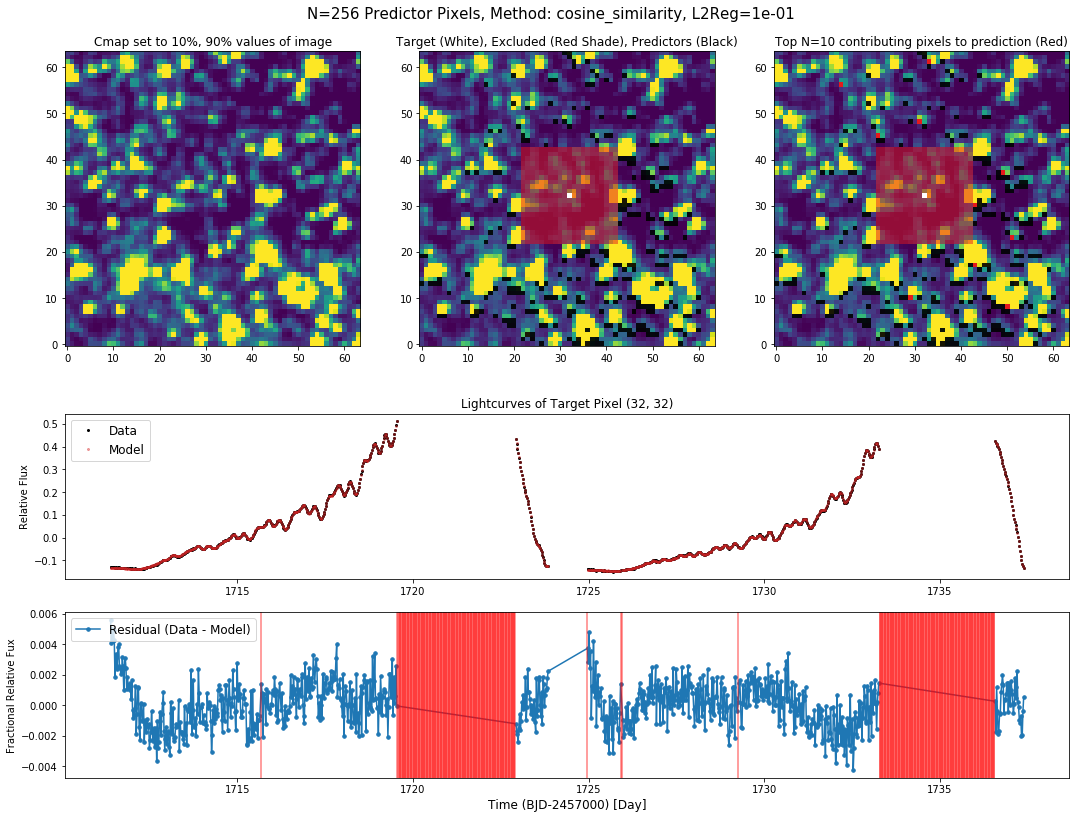

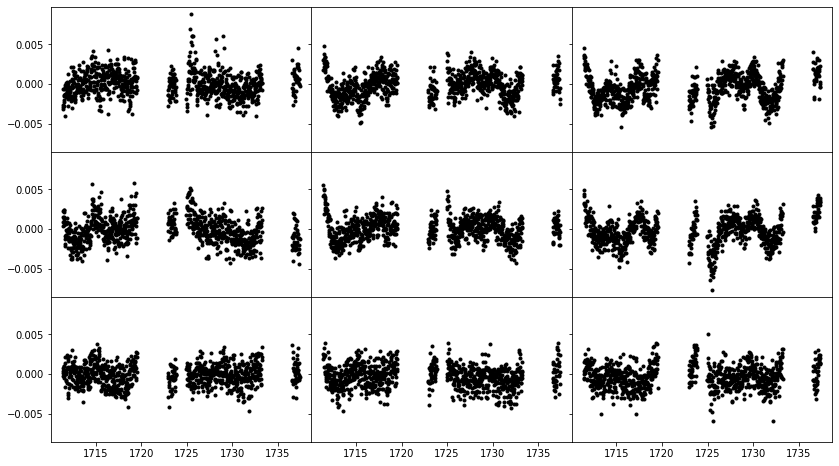

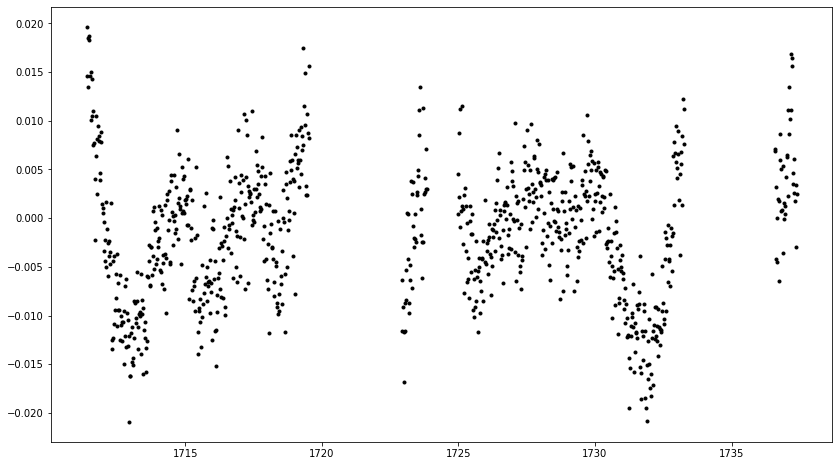

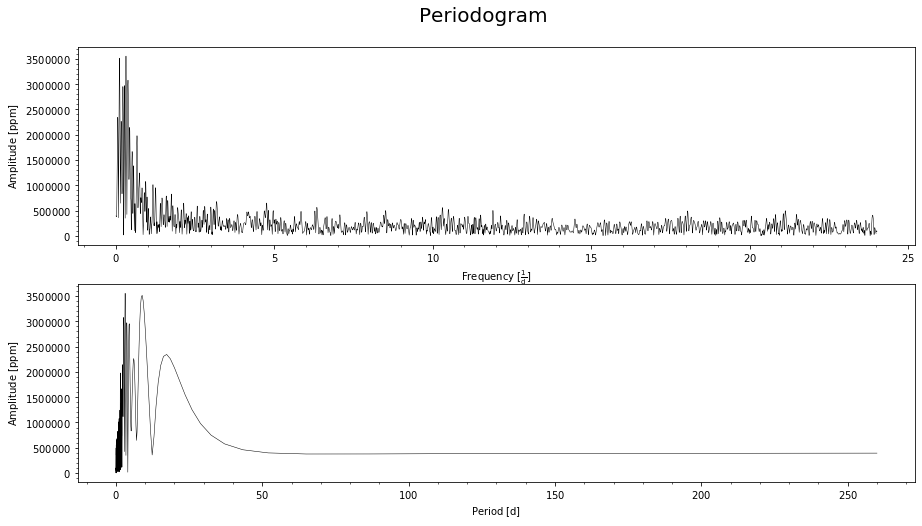

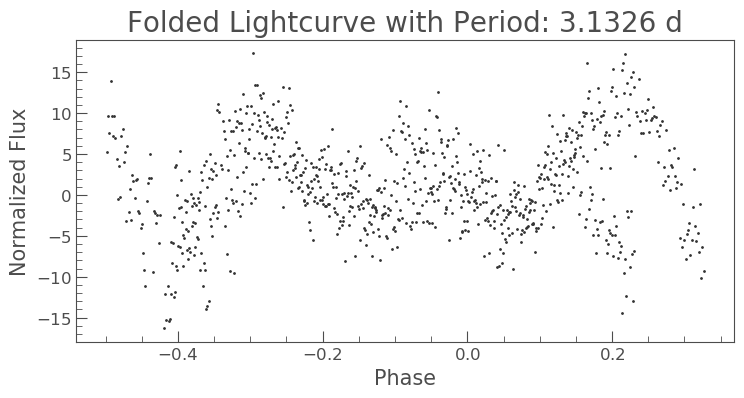

In [15]:
cpm_periodogram("provided_sources/tess-s0015-1-1_325.106020_50.169629_64x64_astrocut.fits")